### Impact of parameterization of additional mixing at the bottom of the mixed layer

In [1]:
import xarray as xr
import numpy as np
import glob
import cmocean
import matplotlib.pyplot as plt
import gsw
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.constants import weddell_convect

In [2]:
base_dir   = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
dir005 = f'{base_dir}output/ERA5_1h_tune0_efr005/files1/'
dir010 = f'{base_dir}output/ERA5_1h_tune0_efr010/files1/'
nemo_mesh='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'

In [3]:
year=2015
T005 = xr.open_dataset(f'{dir005}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
T010 = xr.open_dataset(f'{dir010}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
i005 = xr.open_dataset(f'{dir005}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
i010 = xr.open_dataset(f'{dir010}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')

nemo_mesh     = xr.open_dataset(f'{nemo_mesh}')
nemo_mesh_sub = nemo_mesh.rename({'x':'x_grid_T','y':'y_grid_T','nav_lev':'deptht'}).isel(x_grid_T=weddell_convect['x'], y_grid_T=weddell_convect['y'], time_counter=0)

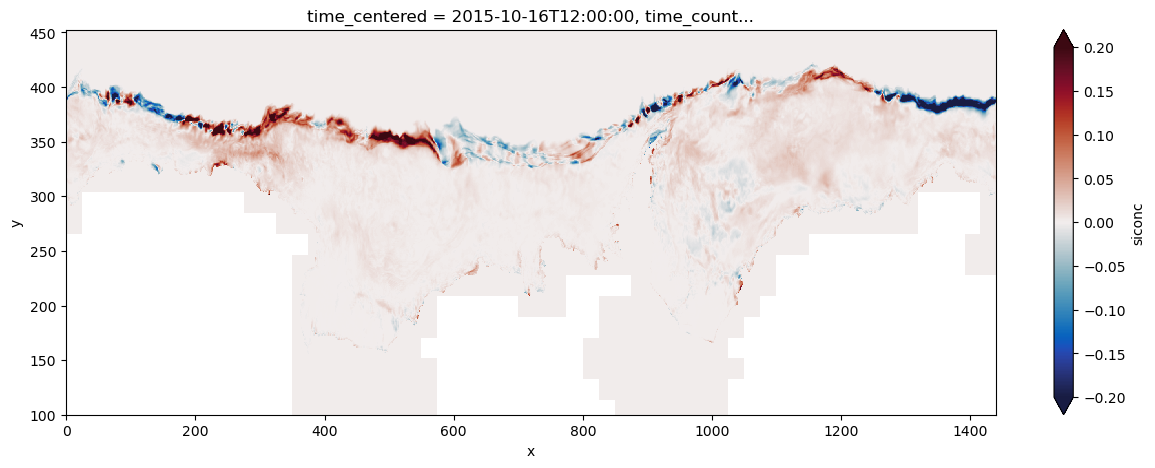

In [4]:
(i010.siconc.isel(time_counter=9) - i005.siconc.isel(time_counter=9)).plot(figsize=(15,5), vmin=-0.2, vmax=0.2, ylim=(100,None), cmap=cmocean.cm.balance)

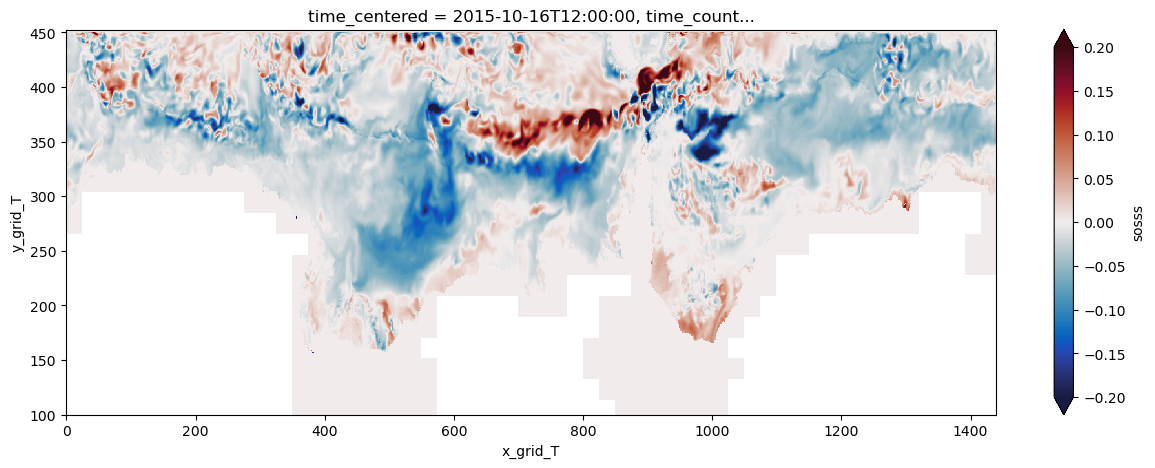

In [6]:
(T010.sosss.isel(time_counter=9) - T005.sosss.isel(time_counter=9)).plot(figsize=(15,5), vmin=-0.2, vmax=0.2, ylim=(100,None), cmap=cmocean.cm.balance)

In [4]:
def calc_weddell_mean(dsin, varname):

    var_ocean  = xr.where(nemo_mesh_sub.tmask==0, np.nan, dsin.isel(x_grid_T=weddell_convect['x'], y_grid_T=weddell_convect['y'])[varname])
    area_ocean = xr.where(nemo_mesh_sub.tmask==0, np.nan, dsin.isel(x_grid_T=weddell_convect['x'], y_grid_T=weddell_convect['y'])['area_grid_T'])
    varout     = (var_ocean*area_ocean).sum(dim=['x_grid_T','y_grid_T'])/(area_ocean.sum(dim=['x_grid_T','y_grid_T']))
    
    return varout

In [5]:
T005_weddell = calc_weddell_mean(T005, 'thetao')
S005_weddell = calc_weddell_mean(T005, 'so')
T010_weddell = calc_weddell_mean(T010, 'thetao')
S010_weddell = calc_weddell_mean(T010, 'so')

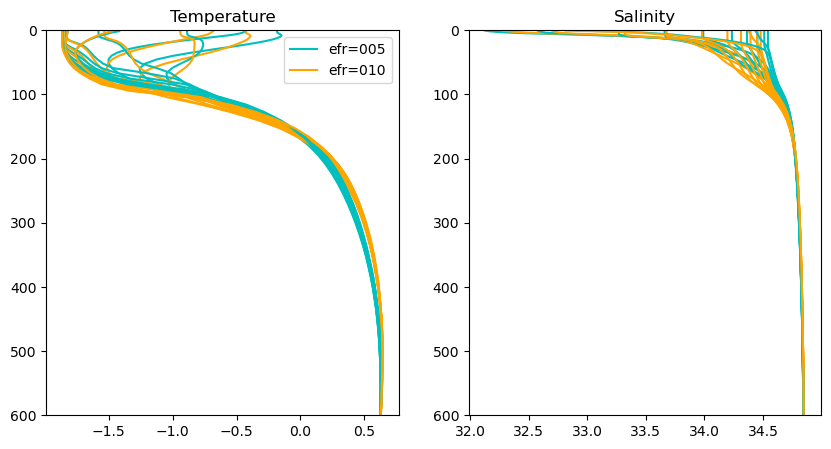

In [33]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
for axis in ax.ravel():
    axis.set_ylim(600, 0)

ax[0].set_title('Temperature')
ax[1].set_title('Salinity')

i=0
for month in range(0,12):
    if i==0:
        leglabel1='efr=005'
        leglabel2='efr=010'
    else:
        leglabel1='_nolegend_'
        leglabel2='_nolegend_'

    ax[0].plot(T005_weddell.isel(time_counter=month), T005_weddell.deptht, label=leglabel1, c='c')
    ax[0].plot(T010_weddell.isel(time_counter=month), T010_weddell.deptht, label=leglabel2, c='orange')
    
    ax[1].plot(S005_weddell.isel(time_counter=month), S005_weddell.deptht, label=leglabel1, c='c')
    ax[1].plot(S010_weddell.isel(time_counter=month), S010_weddell.deptht, label=leglabel2, c='orange')
        
    i+=1

ax[0].legend()

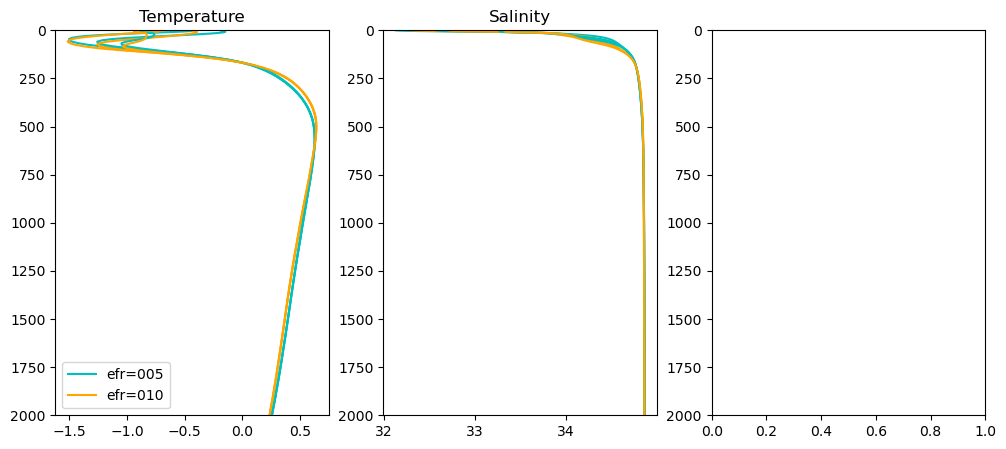

In [8]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
for axis in ax.ravel():
    axis.set_ylim(2000,0)

ax[0].set_title('Temperature')
ax[1].set_title('Salinity')

i=0
for month in range(0,3):
    if i==0:
        leglabel1='efr=005'
        leglabel2='efr=010'
    else:
        leglabel1='_nolegend_'
        leglabel2='_nolegend_'

    ax[0].plot(T005_weddell.isel(time_counter=month), T005_weddell.deptht, label=leglabel1, c='c')
    ax[0].plot(T010_weddell.isel(time_counter=month), T010_weddell.deptht, label=leglabel2, c='orange')
    
    ax[1].plot(S005_weddell.isel(time_counter=month), S005_weddell.deptht, label=leglabel1, c='c')
    ax[1].plot(S010_weddell.isel(time_counter=month), S010_weddell.deptht, label=leglabel2, c='orange')
        
    i+=1

ax[0].legend()

In [6]:
rho005 = gsw.density.sigma0(S005_weddell, T005_weddell)
rho010 = gsw.density.sigma0(S010_weddell, T010_weddell)

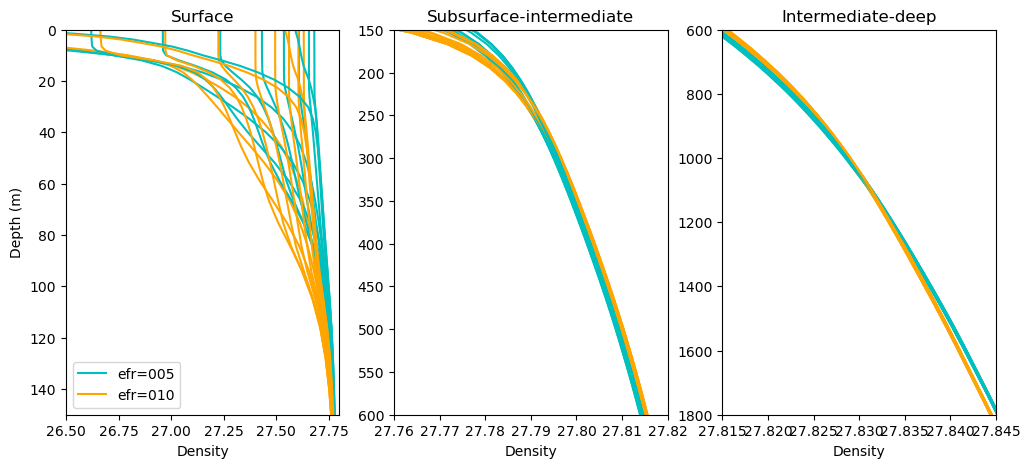

In [8]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
for axis in ax.ravel():
    axis.set_ylim(600, 0)
    axis.set_xlabel('Density')

ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Surface')
ax[1].set_title('Subsurface-intermediate')
ax[2].set_title('Intermediate-deep')

i=0
for month in range(0,12):
    if i==0:
        leglabel1='efr=005'
        leglabel2='efr=010'
    else:
        leglabel1='_nolegend_'
        leglabel2='_nolegend_'

    for axis in ax.ravel():
        axis.plot(rho005.isel(time_counter=month), T005_weddell.deptht, label=leglabel1, c='c')
        axis.plot(rho010.isel(time_counter=month), T010_weddell.deptht, label=leglabel2, c='orange')
        
    i+=1

ax[0].set_xlim(26.5,27.8)
ax[0].set_ylim(150,0)
ax[1].set_xlim(27.76,27.82)
ax[1].set_ylim(600, 150)
ax[2].set_xlim(27.815,27.845)
ax[2].set_ylim(1800, 600)

ax[0].legend()